# Phase plots

In this notebook, I will make phase plots, and the community stabilities. Ofcourse we cannot do this for to high number of species if we want to visualize it (3 max), but it does give a nice idea on to see what happens in the greater picture. 

I will do this in a constructif manner: 
- First 2 species, with no self control. (exponential growth)
- Then 2 species, with self controll ( logistic equation)
- Then 2 species, who interact ( lotka volterra model (prey kind))
- Setup to general:
- Then 3 species Lotka volterra? 
- then N species Ltoka volterra. 

The solution of the ordinary differential equations (ODEs) will be done via the function, Solve_ivp (instead of odeint which is an old api)

# N=2 no self control (exponential growth)

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from FuncPlots import * # contains all the functions you need for plotting.
from Model import * # contains the information needed to generate the general Lotka_Volterra

In [2]:
# dX/dt=F(t,X) where both X and F are arrays. 

def F_NoControl(t,X):
    F=r*X # Here X needs to be np.array.shape=(2,)
    return F

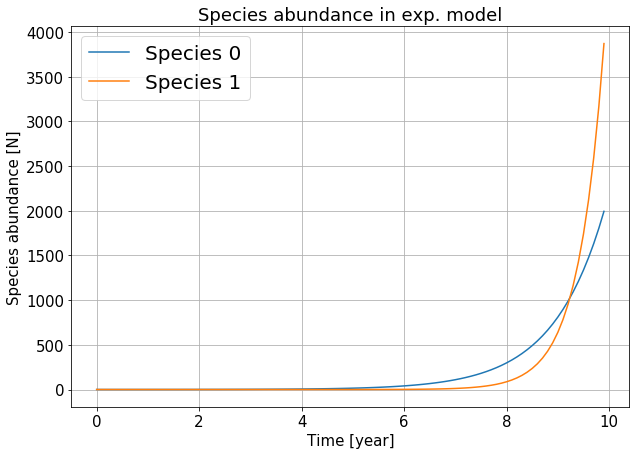

In [13]:
# specification parameters
r=np.array([1,2])

# specification for intergration
tspan=[0,10]# over which time integral should we solve
X0=np.array([0.1,0.00001])
dt=0.1
teval=np.arange(tspan[0],tspan[1],dt)

# specification for plot
FS_Unbound=FigSetting("TimeNonBounded")
FS_Unbound.Title="Species abundance in exp. model"
FS_Unbound.xlabel="Time [year]"
FS_Unbound.ylabel="Species abundance [N]"

#calculate and plot
Sollution=solve_ivp(fun=F_NoControl,t_span=tspan,y0=X0,t_eval=teval)
FigUnbound=FigPlotTime(FS_Unbound,Sollution)
#FigUnbound.savefig("ExpTime.png")

# N=2 with selfcontrol (logistic)

In [4]:
# dX/dt=F(t,X) where both X and F are arrays. 

def F_Logistic(t,X):
    F=r*X-X*X/K # Here X needs to be np.array.shape=(2,)
    return F

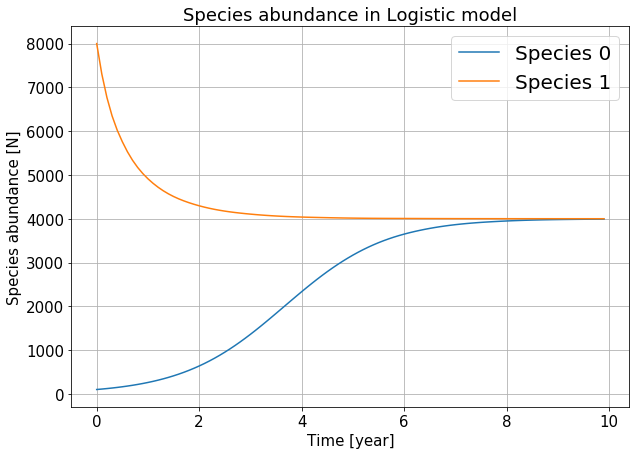

In [16]:
# specification parameters
r=np.array([1,1])# interinisc growth rate
K=np.array([4000,4000])# Capacity / rate ( one has to multiplie by rate to get the real )

# specification for intergration
tspan=[0,10]# over which time integral should we solve
X0=np.array([100,8000])
dt=0.1
teval=np.arange(tspan[0],tspan[1],dt)

# specification for plot
FS_Logistic=FigSetting("TimeLogistic")
FS_Logistic.Title="Species abundance in Logistic model"
FS_Logistic.xlabel="Time [year]"
FS_Logistic.ylabel="Species abundance [N]"

#calculate and plot
Sollution=solve_ivp(fun=F_Logistic,t_span=tspan,y0=X0,t_eval=teval)
FigLogistic=FigPlotTime(FS_Logistic,Sollution)
#FigLogistic.savefig("LogisticTime.png")

# N=2 With interaction lotka volterra model (preditor prey kind)

In [6]:
# dX/dt=F(t,X) where both X and F are arrays. 

def F_LtkaVol(t,X):
    F0=r[0]*X[0]+I[0]*X[0]*X[1] # Here X needs to be np.array.shape=(2,)
    F1=r[1]*X[1]+I[1]*X[1]*X[0]
    return np.array([F0,F1])

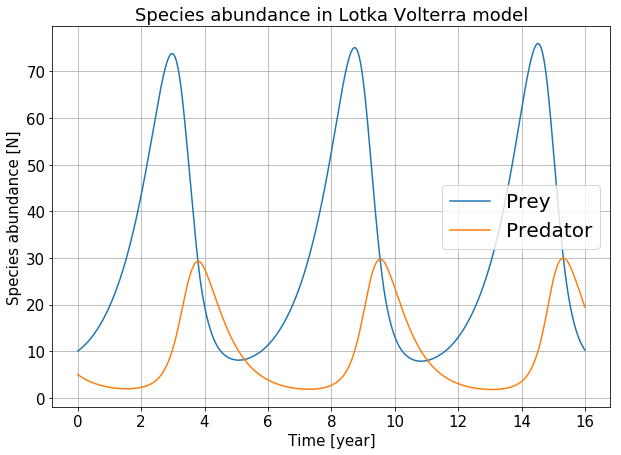

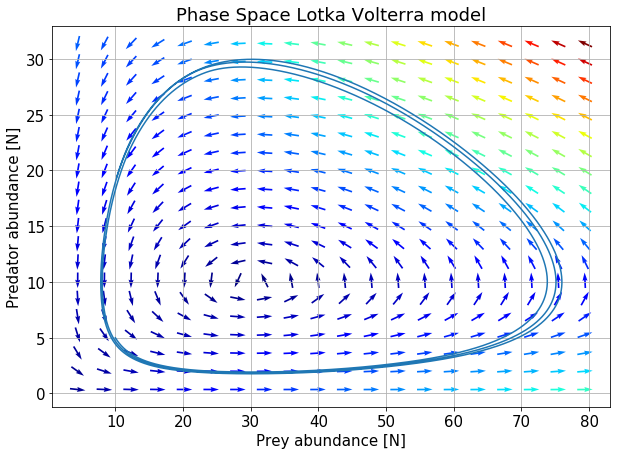

In [20]:
# specification parameters
r=np.array([1,-1.5])# interinisc growth rate
d=0.1 # dying rate
e=0.5 # converision
I=np.array([-1*d,e*d])

# specification for intergration
tspan=[0,16]# over which time integral should we solve
X0=np.array([10,5])
dt=0.001
teval=np.arange(tspan[0],tspan[1],dt)

# specification for plot
FS_LtkaVol=FigSetting("TimeLtkaVol")
FS_LtkaVol.Title="Species abundance in Lotka Volterra model"
FS_LtkaVol.xlabel="Time [year]"
FS_LtkaVol.ylabel="Species abundance [N]"
FS_LtkaVol.label=["Prey","Predator"]

#calculate and plot
Sollution=solve_ivp(fun=F_LtkaVol,t_span=tspan,y0=X0,t_eval=teval)
FigLtkaVol=FigPlotTime(FS_LtkaVol,Sollution)
#FigLtkaVol.savefig("LtkaTime.png")

# Phase plot
FS_LVPhase=FigSetting("PhaseLtkaVol")
FS_LVPhase.Title="Phase Space Lotka Volterra model"
FS_LVPhase.xlabel="Prey abundance [N]"
FS_LVPhase.ylabel="Predator abundance [N]"

FigLtkaVolPhase=FigPlotPhaseSpace(FS_LVPhase,Sollution,F_LtkaVol)
#FigLtkaVolPhase.savefig("PhaseSpaceLtka.png")

# N=2 Generalistation Lotka Volterra

In [8]:
def F_LtkaVolGen(t,X):
    F=r*X+X*np.dot(A,X) # Here X needs to be np.array.shape=(2,)
    return F

def F_LtkaVolGenN2(t,X): # this is needed for the quiver plot
    F0=r[0]*X[0]+X[0]*A[0][0]*X[0]+X[0]*A[0][1]*X[1]
    F1=r[1]*X[1]+X[1]*A[1][0]*X[0]+X[1]*A[1][1]*X[1]
    return np.array([F0,F1])

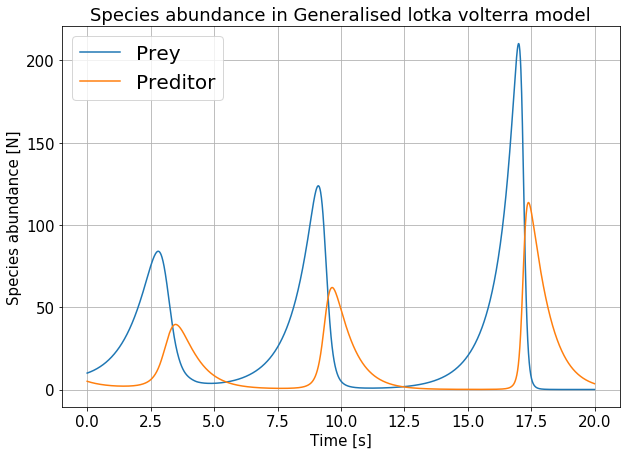

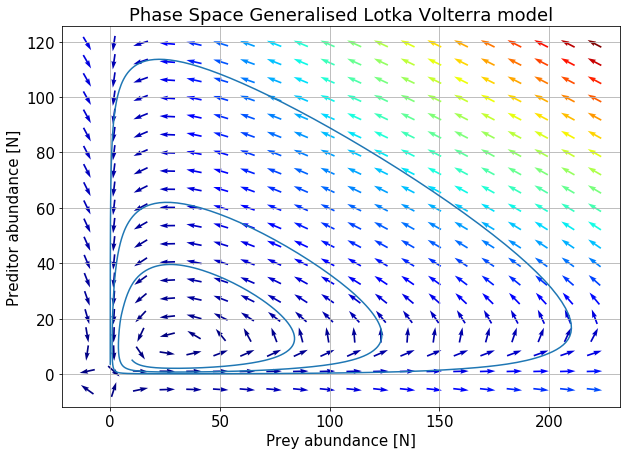

In [9]:
# specification parameters
r=np.array([1,-1.5])# interinisc growth rate
d=0.1 # dying rate of prey by preditors
e=0.5 # converision
K=np.array([300,300])#capacity
A=np.array([[1/K[0],-1*d],[e*d,1/K[1]]])

# specification for intergration
tspan=[0,20]# over which time integral should we solve
X0=np.array([10,5])
dt=0.01
teval=np.arange(tspan[0],tspan[1],dt)

# specification for plot
FS_LtkaVolGen=FigSetting("TimeLtakVolGen")
FS_LtkaVolGen.Title="Species abundance in Generalised lotka volterra model"
FS_LtkaVolGen.xlabel="Time [s]"
FS_LtkaVolGen.ylabel="Species abundance [N]"
FS_LtkaVolGen.label=["Prey","Preditor"]

#calculate and plot
Sollution=solve_ivp(fun=F_LtkaVolGen,t_span=tspan,y0=X0,t_eval=teval)
FigLtkaVol=FigPlotTime(FS_LtkaVolGen,Sollution)

FS_GLVPhase=FigSetting("PhaseGLtkaVol")
FS_GLVPhase.Title="Phase Space Generalised Lotka Volterra model"
FS_GLVPhase.xlabel="Prey abundance [N]"
FS_GLVPhase.ylabel="Preditor abundance [N]"

FigLtkaVolPhase=FigPlotPhaseSpace(FS_GLVPhase,Sollution,F_LtkaVolGenN2)

# N=n generalised Lotka Volterra

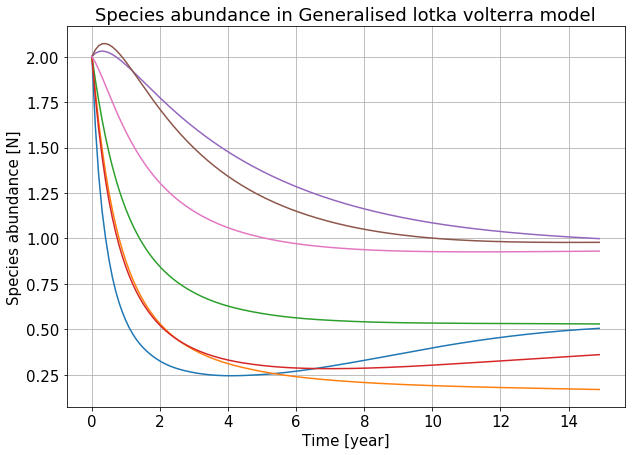

In [21]:
n=7
P=0.9
fm=fr=fs=0
Stable=0
while(not Stable):
    Model=Generate(n,P,fm,fr,fs)
    Stable=Model[3]
r=Model[0]
A=Model[1]
X_fixed=Model[2]

# Create disturbance
sigma=0.3
Dist=sigma*np.random.randn(n)
XStart=X_fixed+Dist
XStart[XStart<=0]=0.01 # don't let it be negatif or zero.

# Or let them start all from one value
XStart=np.ones(n)*2

# specification for intergration
tspan=[0,15]# over which time integral should we solve
X0=XStart
dt=0.1
teval=np.arange(tspan[0],tspan[1],dt)

# specification for plot
FS_LtkaVolGen=FigSetting("TimeLtkaVolGenN")
FS_LtkaVolGen.Title="Species abundance in Generalised lotka volterra model"
FS_LtkaVolGen.xlabel="Time [year]"
FS_LtkaVolGen.ylabel="Species abundance [N]"
FS_LtkaVolGen.SetLegend=0

#calculate and plot
Sollution=solve_ivp(fun=F_LtkaVolGen,t_span=tspan,y0=X0,t_eval=teval)
FigLtkaVol=FigPlotTime(FS_LtkaVolGen,Sollution)
#FigLtkaVol.savefig("GenLtkaTime.png")